# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.
Выполнила студентка гр. 0383 Пустовалова Екатерина. Вариант №63

## Цель работы
Овладеть навыками работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения и анализа сетей аффилированности.

## Основные теоретические положения

<b>Сеть аффилированности</b> - сеть, в которой участники аффилированны друг с другом на основе сотрудничества в рамках какой-то группы или совместного участия в определнном событии, состоит из двух измерений: множества акторов и множества событий.

<b>Подгруппа</b> - подмножество узлов $N_s$.<br>

<b>Клика</b> - максимальный полный подграф из трех или более узлов.

<b>n-Клика</b> - максимальный подграф, в котором наибольшее геодезическое расстояние между любыми двумя узлами не превышает n: $d(i, j)<=n; n_i, n_j $ принадлежат $N_s$

<b>n-Клан</b> - n-клика, в которой d(i, j) между всеми узлами в подграфе не превышает n для всех путей внутри графа.

<b>n-Клуб</b> - максимально полный полграф диаметра <= n

<b>k-Ядро</b> - максимальный подграф, в котором каждая вершина связана минимум с k другими вершинами этого же подграфа.

<b>k-Плекс</b> - это максимальный подграф, содержащий $g_s$ узлов, в котором каждый узел смежен не мене чем с $g_s - k$ узлами подграфа.

<b>Гиперграф</b> − обобщение понятия графа; состоит из множества объектов и множества подмножеств объектов, в котором каждый объект принадлежит хотя бы одному подмножеству, причём ни одно подмножество не является пустым.

<b>Одномодальная сеть</b> − сеть, акторы которой происходят из одного множества.

<b>Модулярность</b> - характеристика структуры сети, в частности степени кластеризации узлов, когда внутри кластера наблюдается много узлов (высокая плотность), а между кластерами мало узлов (низкая плотность)

<b>Матрица соучастия акторов</b>: $X^N = {x_{ij}^N}$: $x_{ij}^N = \sum_{k = 1}^h{a_{ik}a_{jk}} = XX^T$

<b>Матрица перекрытия событий</b>: $X^M = {x_{ij}^M}$: $x_{kl}^M = \sum_{l = 1}^g{a_{il}a_{jl}} = X^TX$

<b>Степень участия</b> - количество событий, с которыми связан каждый актор

<b>Средняя степень участия</b> - количество событий, с которыми актор аффилирован

<b>Размер события</b>: $a_{+j} = x_{jj}^M$

<b>Средний размер событий</b> - количество акторов в каждом событии.

<b>Плотность для отношения соучастия</b>: $\delta_{N} = \frac{1}{g(g-1)}\sum_{i = 1}^{g}\sum_{j = 1}^{g}x_{ij}^N$

<b>Плотность для отношения перекрытия</b>: $\delta_{M} = \frac{1}{h(h-1)}\sum_{k = 1}^{h}\sum_{l = 1}^{h}x_{kl}^M$

<b>Диаметр сети аффилированности</b> - длина самого длинного пути между любой парой акторов и/или событий.

<b>Отношение шансов</b>: $\theta_{kl} = \frac{x_{kl}^Mx_{\overline{kl}}^M}{x_{k\overline{l}}^Mx_{\overline{k}l}^M}$, где <br>
<b>$x_{kl}^M$</b> - число акторов, которые аффилированы с событиями k и l

<b>$x_{\bar{kl}}^M$</b> - число акторов, которые не принадлежат ни одному событию

<b>$x_{k\bar{l}}^M$</b> - число акторов, которы аффилированы с событием k но не с l

<b>$x_{\bar{k}l}^M$</b> - число акторов, аффилированных с l, но не с k

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек про- вести анализ заданных социальных сетей на предмет подгрупп. Провести исследование сети аффилированности CEO. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
Каждый пункт работы (*по возможности*) выполняется с помощью кода.
Рекомендованные языки программирования – R или Python.

1. Из файла florentine_business.csv (для нечётных вариантов) и файла florentine_marital.csv (для чётных вариантов) извлечь социоматрицу с помощью соответствующих функций. Отобразить сеть с помощью одного из алгоритмов укладки.

Были установлены нужные библиотеки:

In [ ]:
install.packages("statnet")
install.packages("HyperG")
install.packages("igraph")
install.packages("sna")
library(statnet)
library(HyperG)
library(igraph)
library(sna)

In [ ]:
nodes <- as.matrix(read.csv("florentine_business.csv", comment.char='#'))
net <- network(nodes, matrix.type = "adjacency", directed = FALSE)
gplot(net, mode="fruchtermanreingold", gmode = 'graph', displaylabels = T)
graph <- graph.adjacency(nodes, mode = "undirected")

Полученная сеть: <br><br>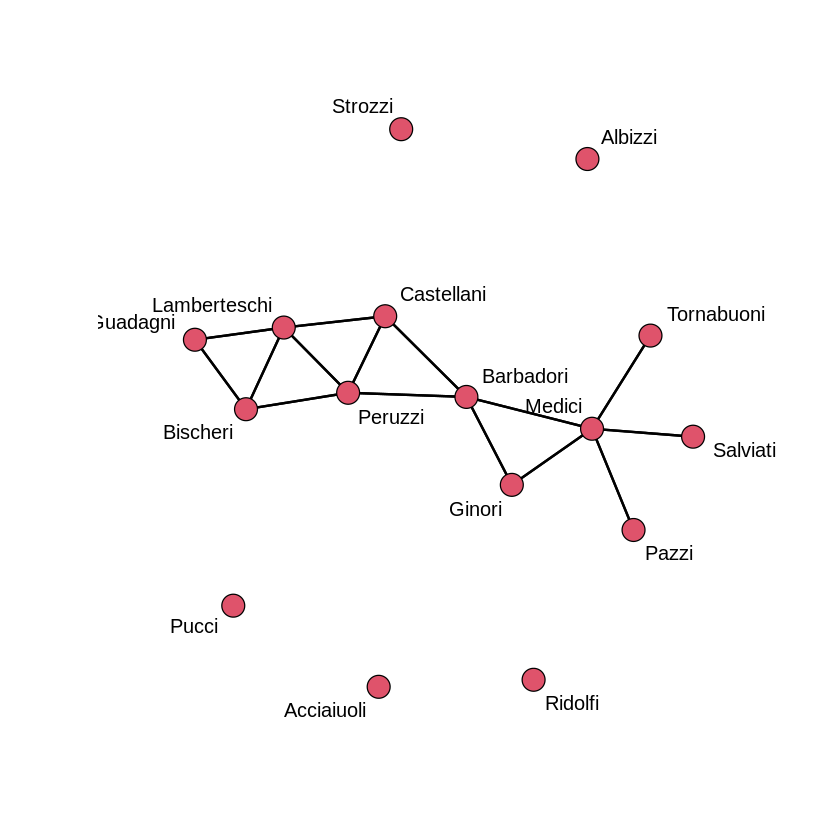

2. Исследовать данную сеть на предмет подгрупп с помощью:<br>
• 𝑛-клик;<br>
• 𝑛-кланов;<bR>
• 𝑛-клубов; <br>
• 𝑘-ядер;<br>
• 𝑘-плексов.<br>
Указать какие подгруппы плучились. Сделать выводы.

In [ ]:
#cliques
print('cliques')
getCliques <- function(graph, order){
  graph <- connect(graph, order = order)
  return(max_cliques(graph,min = 3))
}
findCliques <- function(net){
  graph <- graph.adjacency(as.matrix(net), mode = "undirected")
  order <- 1
  len <- 2
  res <- list()
  while(len > 1){
    cliques <- getCliques(graph,order)
    cliques<-lapply(cliques, function(x) names(x))
    names(cliques) <- rep(paste(order,"clique",sep= "-"),times = length(cliques))
    res <- c(res,cliques)
    order <- order+1
    len <- length(cliques)
  }
  return (res)
}
findCliques(net)

#clans
print('clans')
clanInfo <- function(graph, clique, name){
  subgraph <- subgraph(graph, clique)
  order <- unlist(strsplit(name,"-"))[1]
  diameter <- diameter(subgraph,directed = FALSE)
  if(diameter > order){
    return(FALSE)
  }
  return (TRUE)
}
findClans <- function(net){
  graph <- graph.adjacency(as.matrix(net), mode = "undirected")
  cliques <- findCliques(net)
  mask <- 1:length(cliques)
  mask <-sapply(mask, function(x) clanInfo(graph,cliques[[x]],names(cliques)[x]))
  names(cliques)<-sapply(names(cliques), function(x) paste(unlist(strsplit(x,"-"))[1],"-clan",sep = ""))
  return(cliques[mask])
}
findClans(net)

#kernels
print('kernels')
findKernels <-function(net){
  graph <- graph.adjacency(as.matrix(net), mode="undirected")
  info <- coreness(graph, mode= "all")
  res <-lapply(0:max(as.integer(info)), function(x) names(info)[which(as.integer(info) >= x)])
  names(res) <- sapply(1:length(res), function(x) paste(x-1,"core",sep= "-"))
  return(res)
}
print(findKernels(net))

Выводы:<br>
5-клики и последующие клики совпадают, т.к. все геодезические расстояния в графе между любыми двумя вершинами меньше или равны 5;<br>
В случае с кланами аналогично, будет выводится клан, равный 5-клану;<bR>
к-ядра только от 1 до 2.

3. С помощью библиотеки igraph исследовать алгоритмы обноруже- ния сообществ в зависимости от номера варианта:<bR>
(1) Edge-betweenness, Leading eigenvector, Fast-greedy;<br>
 (2) Spinglass, Walktrap, Label propagation;<br>
<b>(3) InfoMAP, Louvain, Optimal.</b><br>
Кратко объяснить суть каждого алгоритма. Вывести значение модулярности и отобразить полученные сообщества. Сделать выводы.

infoMap повторяет две фазы, пока обьектная функция не станет оптимизированной, а при оптимизации обьектной функции метод использует MAP-уравнение вместо модулярности.

Louvain  работает следующим образом с повторением: сперва обнаруживаются небольшие сообщества путем локальной оптимизации модульности на всех узлах, затем каждое небольшое сообщество группируется в один узел.

Optimal находит сообщества с помощью максимизации модульности. Расчет выполняется путем преобразования максимизации модульности в задачу целочисленного программирования и последующего ее решения. 


[1] 0.3644444

$`1`
[1] "Acciaiuoli"

$`2`
[1] "Albizzi"

$`3`
[1] "Barbadori"  "Ginori"     "Medici"     "Pazzi"      "Salviati"  
[6] "Tornabuoni"

$`4`
[1] "Bischeri"     "Castellani"   "Guadagni"     "Lamberteschi" "Peruzzi"     

$`5`
[1] "Pucci"

$`6`
[1] "Ridolfi"

$`7`
[1] "Strozzi"

[1] 0.3311111

$`1`
[1] "Acciaiuoli"

$`2`
[1] "Albizzi"

$`3`
[1] "Barbadori"  "Castellani" "Peruzzi"   

$`4`
[1] "Bischeri"     "Guadagni"     "Lamberteschi"

$`5`
[1] "Ginori"     "Medici"     "Pazzi"      "Salviati"   "Tornabuoni"

$`6`
[1] "Pucci"

$`7`
[1] "Ridolfi"

$`8`
[1] "Strozzi"

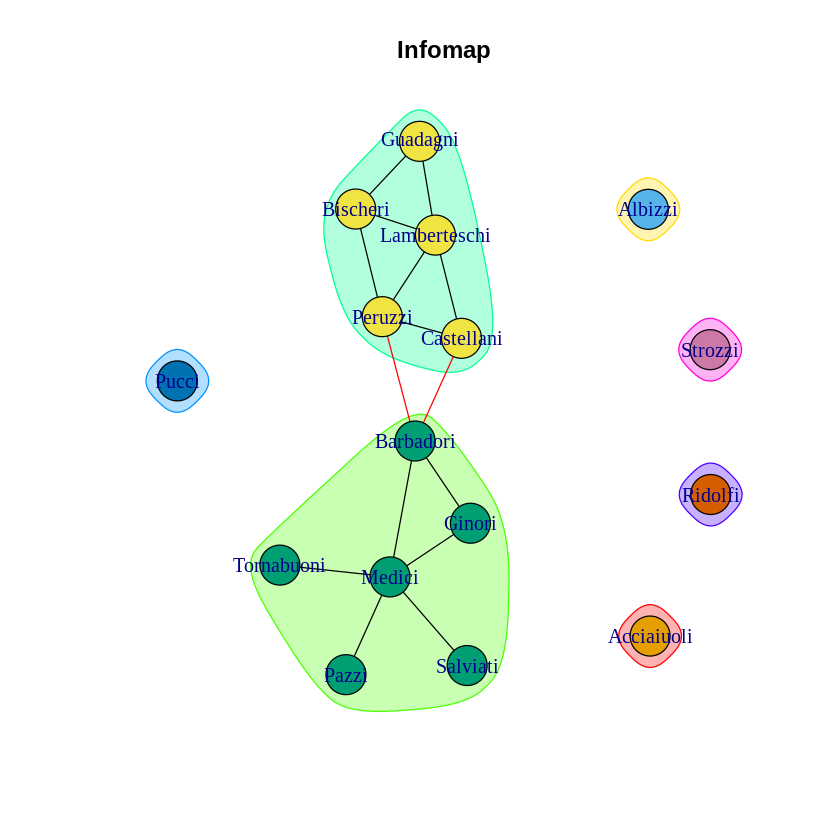

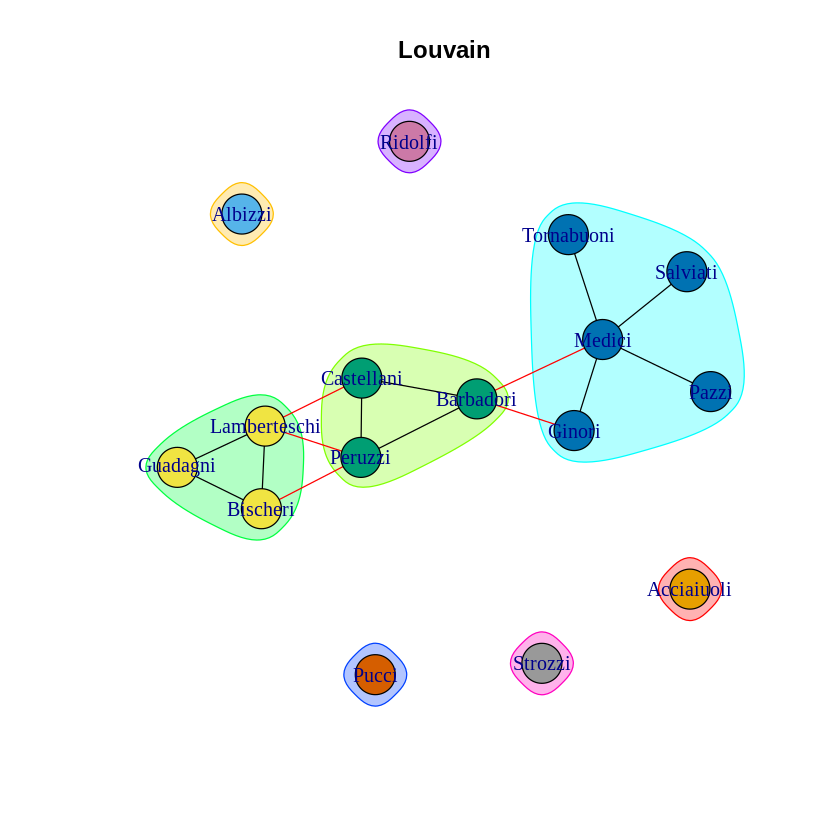

In [20]:
#infoMAP
infomap <- cluster_infomap(graph)
modularity(infomap)
communities(infomap)
plot(infomap, graph, main='Infomap')

#Louvain
louvain<- cluster_louvain(graph)
modularity(louvain)
communities(louvain)
plot(louvain, graph, main='Louvain')



#Optimal
#optimal<- cluster_optimal(graph)
#modularity(optimal)
#communities(optimal)
#plot(optimal, graph, main='Optimal') 
#не работает

Значения модулярности немного отличаются: в первом случае она приблизительно равна 0.364, а во втором 0.331. Так же алгоритмы выделяют разное количество подгрупп: 7 и 8 соответственно.

4. Из файла ceo.csv извлечь матрицу инцидентности с помощью соответствующих функций. Отобразить полученную матрицу.

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


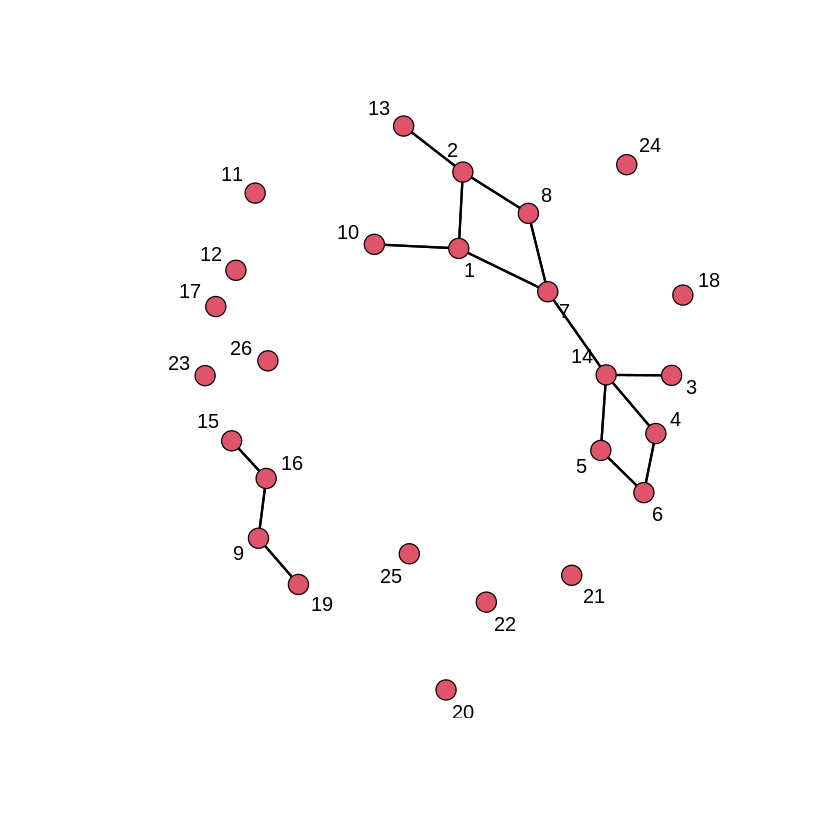

In [21]:
incMatr <- as.matrix(read.csv("ceo.csv", F, comment.char='#'))
incMatr
net2 <- network(incMatr, matrix.type='incidence', directed = F)
gplot(net2, mode="fruchtermanreingold", gmode = 'graph', displaylabels = T)

5. Отобразить сеть в виде биграфа.

In [ ]:
ceog <- graph.incidence(incMatr, mode = "all")
edges_list<-get.edgelist(ceog)
bipart<-make_bipartite_graph(V(ceog)$type, E(ceog)$edges)
plot(ceog, edge.arrow.size = 0.6, layout=layout_as_bipartite)

Полученный граф:<br><br>
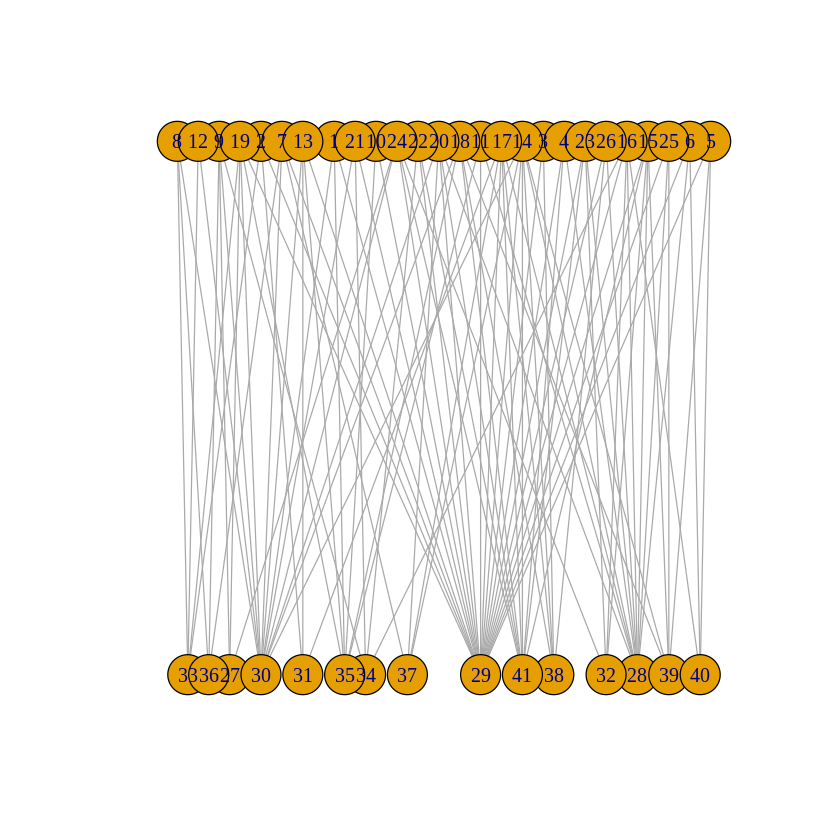

6. Отобразить сеть в виде гиперграфа и двойственного гиперграфа
(по желанию).

In [ ]:
ceohg <- as.hypergraph(ceog)
ceod <- dual_hypergraph(ceohg)
plot(ceohg, main = "Hypergraph")
plot(ceod, main = "Dual hypergraph")

Гиперграф:<br><br>
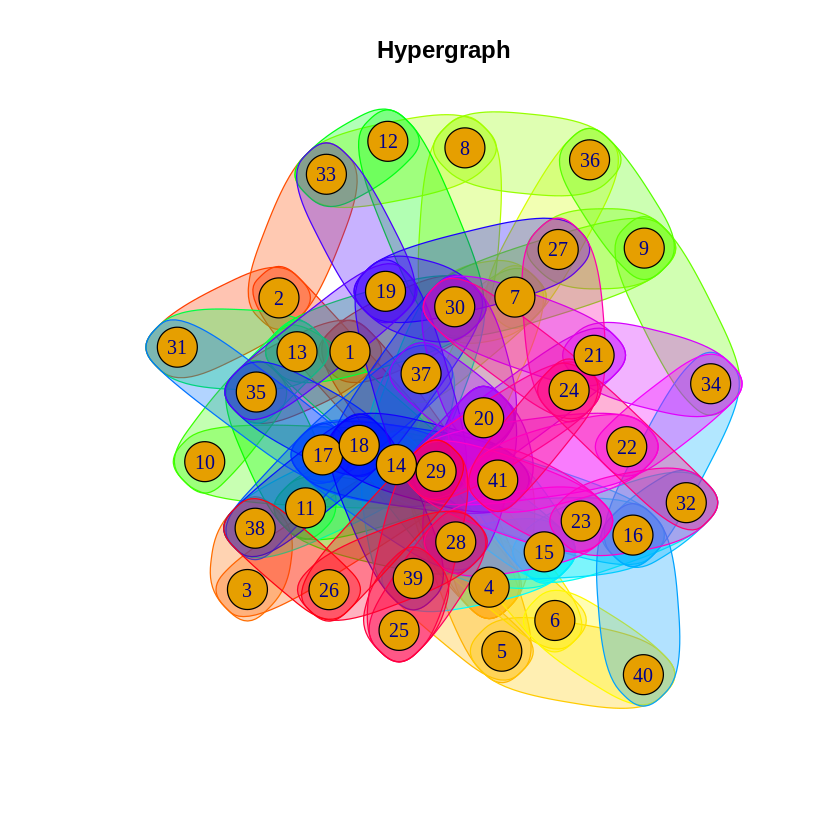

Двойственный гиперграф:<br><br>
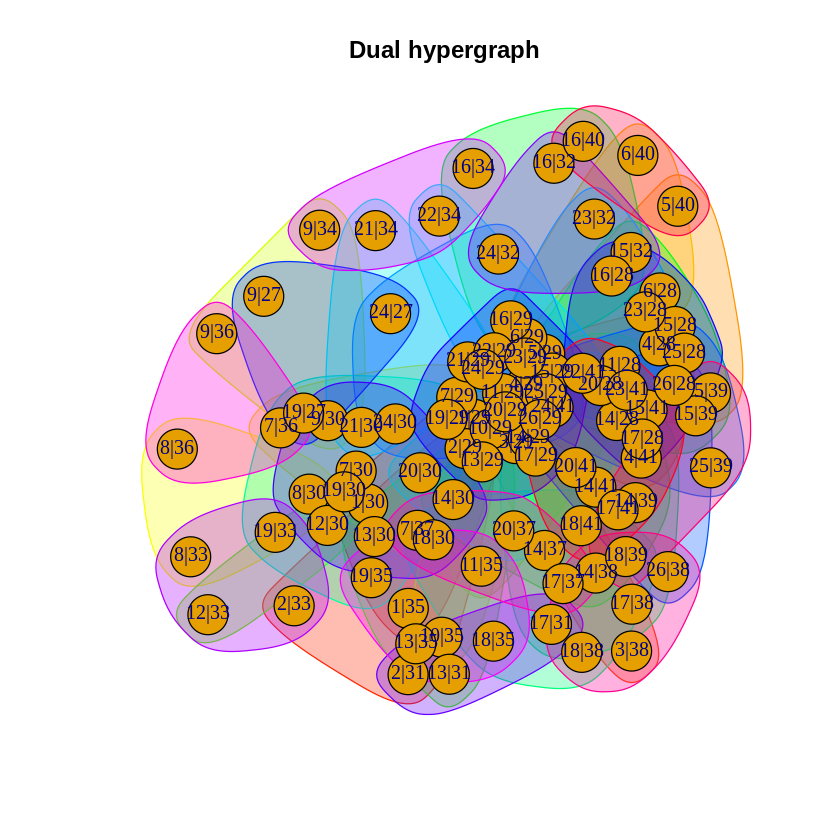

7. Представить сеть аффилированности в виде двух одномодальных сетей: сеть соучастия и сеть перекрытия событий. Представить по- лученные сети в виде ценностных матриц и взвешенных графов. Сделать выводы.

[1] "Сеть соучастия"


3,1,1,1,1,1,2,1,1,2,⋯,1,2,3,2,2,1,1,2,1,1
1,3,1,1,1,1,1,1,0,1,⋯,2,0,2,1,1,1,1,1,1,1
1,1,2,1,1,1,1,0,0,1,⋯,2,1,1,1,1,1,1,1,1,2
1,1,1,3,1,2,1,0,0,1,⋯,3,1,1,3,1,2,3,2,2,2
1,1,1,1,3,2,1,0,0,1,⋯,1,1,1,1,1,1,1,1,2,1
1,1,1,2,2,3,1,0,0,1,⋯,2,0,1,2,1,1,2,1,2,2
2,1,1,1,1,1,4,2,2,1,⋯,2,1,2,3,2,1,1,2,1,1
1,1,0,0,0,0,2,3,2,0,⋯,0,1,2,1,1,0,0,1,0,0
1,0,0,0,0,0,2,2,4,0,⋯,0,1,2,1,2,1,0,2,0,0
2,1,1,1,1,1,1,0,0,2,⋯,1,1,2,1,1,1,1,1,1,1
2,1,1,2,1,2,1,0,0,2,⋯,2,1,2,2,1,1,2,1,2,2


[1] "Сеть перекрытия событий"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
V1,3,0,2,3,0,1,1,1,1,1,0,0,0,0,1
V2,0,11,11,2,1,3,0,1,1,0,3,3,3,2,6
V3,2,11,22,8,3,4,2,3,5,1,4,4,4,3,8
V4,3,2,8,12,1,1,3,2,4,3,3,2,2,0,4
V5,0,1,3,1,3,0,1,0,1,0,1,1,0,0,1
V6,1,3,4,1,0,4,0,1,0,0,0,0,1,1,3
V7,1,0,2,3,1,0,4,0,1,1,0,0,0,0,0
V8,1,1,3,2,0,1,0,4,0,1,0,0,0,1,1
V9,1,1,5,4,1,0,1,0,6,0,0,1,1,0,1
V10,1,0,1,3,0,0,1,1,0,3,1,0,0,0,0


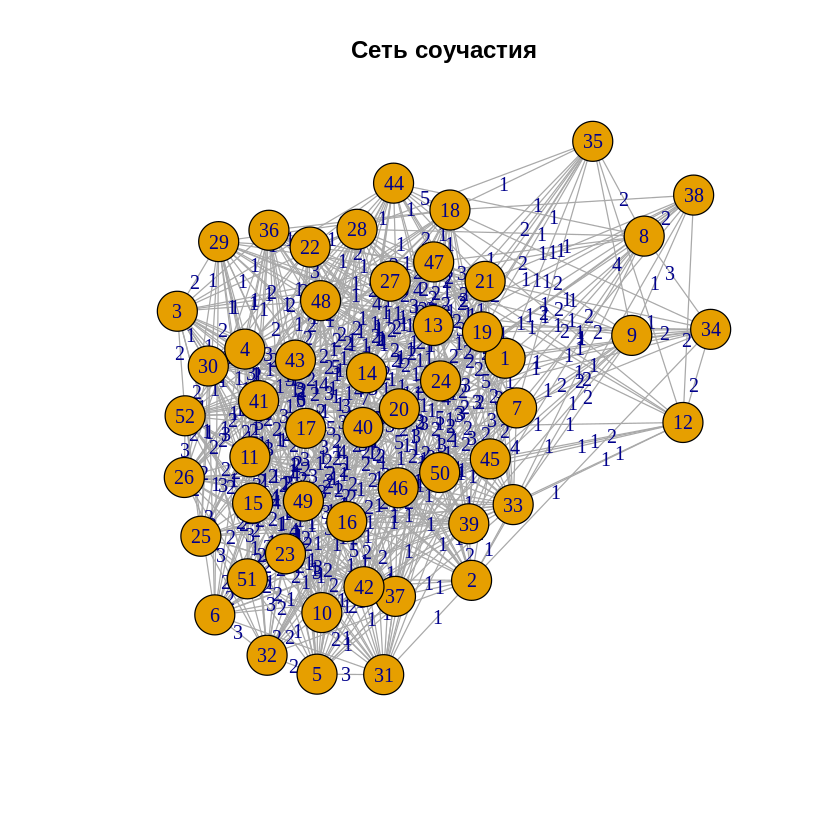

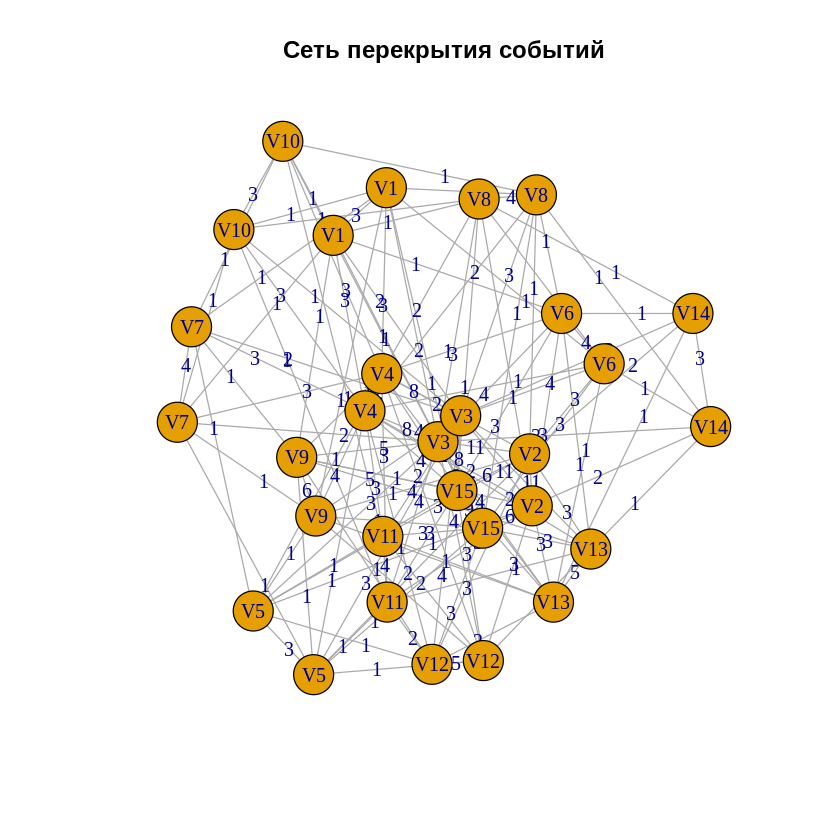

In [26]:
#Сеть соучастия
print('Сеть соучастия')
netS <- incMatr %*% t(incMatr)
s_network = graph.incidence(netS, weighted = TRUE)
netS
plot(s_network,  edge.label = E(s_network)$weight, main="Сеть соучастия")


#Сеть перекрытия событий
print('Сеть перекрытия событий')
netP <- t(incMatr) %*% incMatr
netP
p_network = graph.incidence(netP, weighted = TRUE)
plot(p_network, edge.label = E(p_network)$weight, main="Сеть перекрытия событий")

8. Вычислить степень участия для каждого актора, а также среднее количество событий, с которыми актор аффилирован. Сделать выводы.

In [29]:
#Степень участия
DoP <- diag(netS)
for (i in 1:26) {
    cat("Актор:", i, "Степень участия:", DoP[i], "\n")
}

#Среднее количество событий
print("Среднее количество событий:")
mean_amount <- mean(DoP)
mean_amount

Актор: 1 Степень участия: 3 
Актор: 2 Степень участия: 3 
Актор: 3 Степень участия: 2 
Актор: 4 Степень участия: 3 
Актор: 5 Степень участия: 3 
Актор: 6 Степень участия: 3 
Актор: 7 Степень участия: 4 
Актор: 8 Степень участия: 3 
Актор: 9 Степень участия: 4 
Актор: 10 Степень участия: 2 
Актор: 11 Степень участия: 3 
Актор: 12 Степень участия: 2 
Актор: 13 Степень участия: 4 
Актор: 14 Степень участия: 7 
Актор: 15 Степень участия: 5 
Актор: 16 Степень участия: 5 
Актор: 17 Степень участия: 6 
Актор: 18 Степень участия: 5 
Актор: 19 Степень участия: 5 
Актор: 20 Степень участия: 5 
Актор: 21 Степень участия: 3 
Актор: 22 Степень участия: 3 
Актор: 23 Степень участия: 4 
Актор: 24 Степень участия: 5 
Актор: 25 Степень участия: 3 
Актор: 26 Степень участия: 3 
[1] "Среднее количество событий:"


[1] 3.769231

Наибольшая степень участия - 7, наименьшая - 2, средняя степень участия акторов - 3,769. Следовательно, разброс значений относительно средней степени участия акторов можно назвать небольшим.

9. Вычислить размер и средний размер для каждого события. Сделать выводы.

In [30]:
#Размер
size <- diag(netP)
for (i in 1:dim(netP)[1]) {
    cat("Событие", i, "имеет размер", size[i], "\n")
}

#Средний размер
print("Средний размер:")
mean_size <- mean(size)
mean_size

Событие 1 имеет размер 3 
Событие 2 имеет размер 11 
Событие 3 имеет размер 22 
Событие 4 имеет размер 12 
Событие 5 имеет размер 3 
Событие 6 имеет размер 4 
Событие 7 имеет размер 4 
Событие 8 имеет размер 4 
Событие 9 имеет размер 6 
Событие 10 имеет размер 3 
Событие 11 имеет размер 4 
Событие 12 имеет размер 5 
Событие 13 имеет размер 5 
Событие 14 имеет размер 3 
Событие 15 имеет размер 9 
[1] "Средний размер:"


[1] 6.533333

Наименьший размер события - 3, наибольший - 22, средний размер событий - 6,53. Можно заметить, что разброс значений относительного среднего размера событий достаточно большой.

10. Вычислить плотность для соотношения соучастия и отношения перекрытия. Проинтерпретируйте полученные значения.

In [32]:
#Плотность для соотношения соучастия
g <- nrow(netS)
DS <- (sum(netS) - sum(diag(netS)))/(g*(g - 1))
cat("Плотность для соотношения соучастия:", DS, "\n")


#Плотность для соотношения перекрытия
h <- nrow(netP)
DP <- (sum(netP) - sum(diag(netP)))/(h*(h - 1))
cat("Плотность для соотношения перекрытия:", DP, "\n")
     

Плотность для соотношения соучастия: 1.412308 
Плотность для соотношения перекрытия: 1.485714 


Полученные значения плотностей приблизительно равны.

11. Определить диаметр сети аффилированности.

In [34]:
cat("D =", diameter(graph))

D = 5

Диаметр сети аффилированности равен 5.

12. Определить клики уровня 𝑐 = {4,3} для отношения соучастия и клики уровня 𝑐 = {6, 5, 4, 3, 2} для отношения перекрытия событий. Сделать выводы.

In [43]:
Sn <- tcrossprod(incMatr)
coop <- graph.adjacency(Sn, mode = 'undirected', weighted = T)

#Клики уровня c = {4, 3}
graph12 <- delete.edges(coop, E(coop)[E(coop)$weight < 4])
res14 <- max_cliques(graph12, min=3) 
graph12 <- delete.edges(coop, E(coop)[E(coop)$weight < 3])
res13 <- max_cliques(graph12, min=3)

cat("Клики уровня 𝑐 = {4,3} для отношения соучастия", "\n")
res14
res13

Клики уровня 𝑐 = {4,3} для отношения соучастия 


[[1]]
+ 3/26 vertices, from 0992df7:
[1] 20 14 17


[[1]]
+ 3/26 vertices, from 79dce6f:
[1]  1 13 19

[[2]]
+ 3/26 vertices, from 79dce6f:
[1]  7 14 20

[[3]]
+ 3/26 vertices, from 79dce6f:
[1] 16 15 23

[[4]]
+ 3/26 vertices, from 79dce6f:
[1] 25 14 15

[[5]]
+ 3/26 vertices, from 79dce6f:
[1] 26 14 17

[[6]]
+ 5/26 vertices, from 79dce6f:
[1] 24 14 23 20 15

[[7]]
+ 6/26 vertices, from 79dce6f:
[1] 14  4 23 20 17 15


In [44]:
over <- graph.adjacency(netP, mode = 'undirected', weighted = T)

#Клики уровня c = {6, 5, 4, 3, 2}
graph12 <- delete.edges(over, E(over)[E(over)$weight < 6])
res26 <-max_cliques(graph12, min=3) 
graph12 <- delete.edges(over, E(over)[E(over)$weight < 5])
res25 <- max_cliques(graph12, min=3) 
graph12 <- delete.edges(over, E(over)[E(over)$weight < 4])
res24 <- max_cliques(graph12, min=3)
graph12 <- delete.edges(over, E(over)[E(over)$weight < 3])
res23 <- max_cliques(graph12, min=3)
graph12 <- delete.edges(over, E(over)[E(over)$weight < 2])
res22 <- max_cliques(graph12, min=3)  

cat("Клики уровня 𝑐 = {6, 5, 4, 3, 2} для отношения перекрытия событий", "\n")
res26
res25
res24
res23
res22

Клики уровня 𝑐 = {6, 5, 4, 3, 2} для отношения перекрытия событий 


[[1]]
+ 3/15 vertices, named, from 566f894:
[1] V2  V3  V15


[[1]]
+ 3/15 vertices, named, from b5dc126:
[1] V2  V3  V15


[[1]]
+ 3/15 vertices, named, from 1316edf:
[1] V15 V3  V2 

[[2]]
+ 3/15 vertices, named, from 1316edf:
[1] V15 V3  V4 

[[3]]
+ 3/15 vertices, named, from 1316edf:
[1] V4 V3 V9


[[1]]
+ 3/15 vertices, named, from 38105aa:
[1] V9 V3 V4

[[2]]
+ 4/15 vertices, named, from 38105aa:
[1] V13 V2  V15 V3 

[[3]]
+ 4/15 vertices, named, from 38105aa:
[1] V15 V3  V2  V6 

[[4]]
+ 4/15 vertices, named, from 38105aa:
[1] V15 V3  V2  V11

[[5]]
+ 4/15 vertices, named, from 38105aa:
[1] V15 V3  V2  V12

[[6]]
+ 4/15 vertices, named, from 38105aa:
[1] V15 V3  V4  V11


[[1]]
+ 3/15 vertices, named, from 957c923:
[1] V1 V3 V4

[[2]]
+ 3/15 vertices, named, from 957c923:
[1] V7 V3 V4

[[3]]
+ 3/15 vertices, named, from 957c923:
[1] V8 V3 V4

[[4]]
+ 3/15 vertices, named, from 957c923:
[1] V9 V3 V4

[[5]]
+ 3/15 vertices, named, from 957c923:
[1] V14 V2  V3 

[[6]]
+ 4/15 vertices, named, from 957c923:
[1] V6  V2  V15 V3 

[[7]]
+ 6/15 vertices, named, from 957c923:
[1] V15 V2  V12 V4  V3  V11

[[8]]
+ 6/15 vertices, named, from 957c923:
[1] V15 V2  V12 V4  V3  V13


13. Для каждых пар событий определить отношение шансов. Сделать выводы.

In [46]:
nkl <- t(incMatr) %*% incMatr
notnkl <- (1 - t(incMatr)) %*% (1 - incMatr)
nk_l <- (1 - t(incMatr)) %*% incMatr
k_nl <- t(incMatr) %*% (1 - incMatr)
res <- c()
for(i in 2:nrow(nkl)){
    for(j in 1:(i-1)){
        cat(paste("Theta(", i, ",", j, ") = ", (nkl[i,j]*notnkl[i,j])/(nk_l[i,j]*k_nl[i,j]), sep=" "), "\n")
    }
}

Theta( 2 , 1 ) =  0 
Theta( 3 , 1 ) =  0.3 
Theta( 3 , 2 ) =  Inf 
Theta( 4 , 1 ) =  Inf 
Theta( 4 , 2 ) =  0.111111111111111 
Theta( 4 , 3 ) =  0 
Theta( 5 , 1 ) =  0 
Theta( 5 , 2 ) =  0.65 
Theta( 5 , 3 ) =  Inf 
Theta( 5 , 4 ) =  0.545454545454545 
Theta( 6 , 1 ) =  3.33333333333333 
Theta( 6 , 2 ) =  5.25 
Theta( 6 , 3 ) =  Inf 
Theta( 6 , 4 ) =  0.333333333333333 
Theta( 6 , 5 ) =  0 
Theta( 7 , 1 ) =  3.33333333333333 
Theta( 7 , 2 ) =  0 
Theta( 7 , 3 ) =  0.1 
Theta( 7 , 4 ) =  4.33333333333333 
Theta( 7 , 5 ) =  3.33333333333333 
Theta( 7 , 6 ) =  0 
Theta( 8 , 1 ) =  3.33333333333333 
Theta( 8 , 2 ) =  0.4 
Theta( 8 , 3 ) =  0.473684210526316 
Theta( 8 , 4 ) =  1.2 
Theta( 8 , 5 ) =  0 
Theta( 8 , 6 ) =  2.11111111111111 
Theta( 8 , 7 ) =  0 
Theta( 9 , 1 ) =  1.8 
Theta( 9 , 2 ) =  0.2 
Theta( 9 , 3 ) =  0.882352941176471 
Theta( 9 , 4 ) =  3 
Theta( 9 , 5 ) =  1.8 
Theta( 9 , 6 ) =  0 
Theta( 9 , 7 ) =  1.13333333333333 
Theta( 9 , 8 ) =  0 
Theta( 10 , 1 ) =  5.25 
Theta(

Встречается достаточно много строк, где значение равно нулю, это говорит о том, что существуют события без общих акторов. Также иногда встречаются строки, где значение равно *Inf*, это значит, что актор, который встречается в одном из событий пары, встречается и в другом событии.

## Выводы

В ходе выполнения данной практической работы была проанализирована сеть из файла ***florentine_business.csv***. Для данной сети были вычислены необходимые характеристики (например, k-ядра), были выведены значения модулярности и сообщества, полученные при помощи данных алгоритмов обнаружения сообществ. Помимо этого была проанализирована сеть из файла ***ceo.csv***, для нее были представлены биграф, гиперграф (в т.ч. двойственный), сеть аффилированности была представлена в виде сети соучастия и сети перекрытия событий, были вычислены требуемые характеристики (например, степень соучастия).